In [2]:
import numpy as np
import pandas as pd
import openpyxl
import xlsxwriter
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing as preprocessing
from random import randrange
from sklearn.cluster import KMeans
import geopandas as gpd
import os
from matplotlib import pyplot as plet

In [4]:
cwd = os.getcwd()
df = pd.read_excel(f'{cwd}/Produksi Tanaman Buah-buahan.xlsx')
dfkl = pd.read_excel(f'{cwd}/Produksi Tanaman Buah-buahan.xlsx')

print(df.head(35))

               Provinsi  Alpukat (Ton)  Belimbing (Ton)  \
0                  ACEH        44484.0           1202.0   
1        SUMATERA UTARA        35378.0           6447.0   
2        SUMATERA BARAT        84083.0            975.0   
3                  RIAU         1714.0           2439.0   
4                 JAMBI        10489.0           1438.0   
5      SUMATERA SELATAN        15927.0           1367.0   
6              BENGKULU         6877.0            312.0   
7               LAMPUNG        24008.0           4106.0   
8       BANGKA BELITUNG         1509.0            116.0   
9        KEPULAUAN RIAU           93.0             66.0   
10          DKI JAKARTA         1698.0           3040.0   
11           JAWA BARAT       110046.0           8769.0   
12          JAWA TENGAH        75707.0          18878.0   
13        DI YOGYAKARTA        10931.0            667.0   
14           JAWA TIMUR       158581.0          75970.0   
15               BANTEN         1444.0           1449.0 

In [7]:
dfkl.columns = ['provinsi','alpukat','belimbing','duku','durian','jambubiji','jambuair','jeruksiam','jerukbesar','mangga','manggis','nangka','nanas','pepaya','pisang','rambutan','salak','sawo','markisa','sirsak','sukun','melon','semangka','blewah','apel','anggur','stroberi']
print(dfkl.head(6))

   provinsi  alpukat  belimbing     duku    durian  jambubiji  jambuair  \
0         0  44484.0     1202.0   6814.0   45915.0    12144.0    5445.0   
1        33  35378.0     6447.0  24308.0  119632.0    15634.0   18587.0   
2        31  84083.0      975.0   7676.0  170707.0     9335.0   16996.0   
3        25   1714.0     2439.0   7595.0   30114.0    10235.0    9039.0   
4         8  10489.0     1438.0  18072.0   26209.0     4707.0    4587.0   
5        32  15927.0     1367.0  67476.0   46309.0     7373.0   11316.0   

   jeruksiam  jerukbesar   mangga  ...     sawo  markisa   sirsak   sukun  \
0    12319.0     10221.0  21782.0  ...   4732.0        0   1289.0  2022.0   
1   448211.0       322.0  46162.0  ...  18633.0        0   2650.0  1775.0   
2   118578.0       646.0  17066.0  ...  14916.0        0  10030.0  3696.0   
3    58787.0       760.0  19737.0  ...   5752.0        0   1601.0  2298.0   
4    45766.0       190.0   7673.0  ...   4263.0        0   2605.0  3085.0   
5    71678.0

In [8]:
le = LabelEncoder()
dfkl['provinsi'] = le.fit_transform(dfkl['provinsi'])
print(dfkl.head(35))

# to_encode = ["provinsi"]
# for col in to_encode:
#     dfkl[col] = preprocessing.LabelEncoder().fit(dfkl[col])
#     dfkl[col] = preprocessing.LabelEncoder().fit_transform(dfkl[col])
    
# print(dfkl.head(6))

    provinsi   alpukat  belimbing     duku    durian  jambubiji  jambuair  \
0          0   44484.0     1202.0   6814.0   45915.0    12144.0    5445.0   
1         33   35378.0     6447.0  24308.0  119632.0    15634.0   18587.0   
2         31   84083.0      975.0   7676.0  170707.0     9335.0   16996.0   
3         25    1714.0     2439.0   7595.0   30114.0    10235.0    9039.0   
4          8   10489.0     1438.0  18072.0   26209.0     4707.0    4587.0   
5         32   15927.0     1367.0  67476.0   46309.0     7373.0   11316.0   
6          4    6877.0      312.0    242.0   18639.0     1614.0     984.0   
7         18   24008.0     4106.0   8911.0   20394.0    11438.0    7624.0   
8          2    1509.0      116.0    852.0    6212.0      640.0    1357.0   
9         17      93.0       66.0    296.0    2714.0      415.0     308.0   
10         6    1698.0     3040.0     19.0     223.0      975.0    2557.0   
11         9  110046.0     8769.0   9091.0   86785.0    69249.0   23585.0   

In [9]:
dfkl = dfkl.drop(['blewah'],axis=1)
dfkl = dfkl.drop(['markisa'],axis=1)
dfkl.head(35)

,provinsi,alpukat,belimbing,duku,durian,jambubiji,jambuair,jeruksiam,jerukbesar,mangga,...,rambutan,salak,sawo,sirsak,sukun,melon,semangka,apel,anggur,stroberi
0,0,44484.0,1202.0,6814.0,45915.0,12144.0,5445.0,12319.0,10221.0,21782.0,...,38813.0,430.0,4732.0,1289.0,2022.0,343.0,7725.0,79.0,0.0,60.0
1,33,35378.0,6447.0,24308.0,119632.0,15634.0,18587.0,448211.0,322.0,46162.0,...,34655.0,292881.0,18633.0,2650.0,1775.0,1754.0,19899.0,0.0,3.0,83.0
2,31,84083.0,975.0,7676.0,170707.0,9335.0,16996.0,118578.0,646.0,17066.0,...,34541.0,3608.0,14916.0,10030.0,3696.0,1985.0,20283.0,17.0,1.0,274.0
3,25,1714.0,2439.0,7595.0,30114.0,10235.0,9039.0,58787.0,760.0,19737.0,...,40510.0,3202.0,5752.0,1601.0,2298.0,757.0,16046.0,0.0,10.0,0.0
4,8,10489.0,1438.0,18072.0,26209.0,4707.0,4587.0,45766.0,190.0,7673.0,...,7857.0,8235.0,4263.0,2605.0,3085.0,485.0,4979.0,0.0,2.0,9.0
5,32,15927.0,1367.0,67476.0,46309.0,7373.0,11316.0,71678.0,465.0,20324.0,...,18500.0,1764.0,9662.0,1696.0,3828.0,2101.0,14385.0,3.0,1.0,21.0
6,4,6877.0,312.0,242.0,18639.0,1614.0,984.0,22732.0,0.0,6392.0,...,4942.0,2057.0,1609.0,474.0,398.0,270.0,604.0,0.0,5.0,57.0
7,18,24008.0,4106.0,8911.0,20394.0,11438.0,7624.0,79981.0,472.0,24609.0,...,17273.0,7984.0,14344.0,2883.0,8082.0,676.0,18320.0,0.0,17.0,0.0
8,2,1509.0,116.0,852.0,6212.0,640.0,1357.0,1583.0,8.0,2237.0,...,3044.0,1006.0,536.0,124.0,517.0,266.0,2268.0,0.0,0.0,0.0
9,17,93.0,66.0,296.0,2714.0,415.0,308.0,163.0,9.0,1412.0,...,2551.0,5616.0,157.0,172.0,317.0,13.0,1601.0,0.0,0.0,0.0


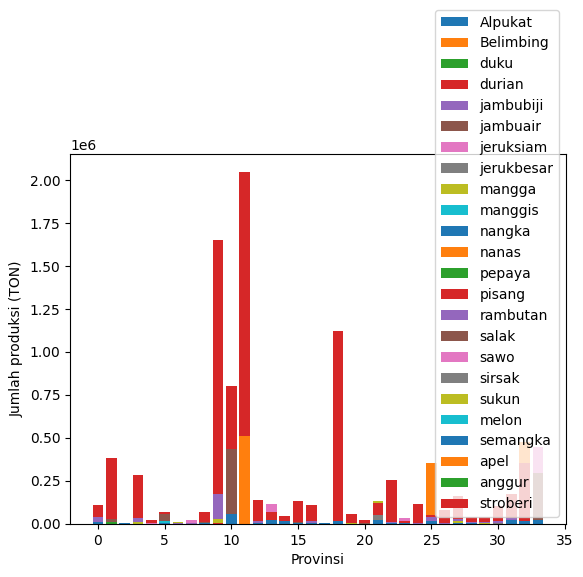

In [6]:
plet.bar(dfkl['provinsi'], dfkl['alpukat'], linewidth= 0.9, alpha= 1, label='Alpukat')
plet.bar(dfkl['provinsi'], dfkl['belimbing'], linewidth= 0.9, alpha= 1, label='Belimbing')
plet.bar(dfkl['provinsi'], dfkl['duku'], linewidth= 0.9, alpha= 1, label='duku')
plet.bar(dfkl['provinsi'], dfkl['durian'], linewidth= 0.9, alpha= 1, label='durian')
plet.bar(dfkl['provinsi'], dfkl['jambubiji'], linewidth= 0.9, alpha= 1, label='jambubiji')
plet.bar(dfkl['provinsi'], dfkl['jambuair'], linewidth= 0.9, alpha= 1, label='jambuair')
plet.bar(dfkl['provinsi'], dfkl['jeruksiam'], linewidth= 0.9, alpha= 1, label='jeruksiam')
plet.bar(dfkl['provinsi'], dfkl['jerukbesar'], linewidth= 0.9, alpha= 1, label='jerukbesar')
plet.bar(dfkl['provinsi'], dfkl['mangga'], linewidth= 0.9, alpha= 1, label='mangga')
plet.bar(dfkl['provinsi'], dfkl['manggis'], linewidth= 0.9, alpha= 1, label='manggis')
plet.bar(dfkl['provinsi'], dfkl['nangka'], linewidth= 0.9, alpha= 1, label='nangka')
plet.bar(dfkl['provinsi'], dfkl['nanas'], linewidth= 0.9, alpha= 1, label='nanas')
plet.bar(dfkl['provinsi'], dfkl['pepaya'], linewidth= 0.9, alpha= 1, label='pepaya')
plet.bar(dfkl['provinsi'], dfkl['pisang'], linewidth= 0.9, alpha= 1, label='pisang')
plet.bar(dfkl['provinsi'], dfkl['rambutan'], linewidth= 0.9, alpha= 1, label='rambutan')
plet.bar(dfkl['provinsi'], dfkl['salak'], linewidth= 0.9, alpha= 1, label='salak')
plet.bar(dfkl['provinsi'], dfkl['sawo'], linewidth= 0.9, alpha= 1, label='sawo')
plet.bar(dfkl['provinsi'], dfkl['sirsak'], linewidth= 0.9, alpha= 1, label='sirsak')
plet.bar(dfkl['provinsi'], dfkl['sukun'], linewidth= 0.9, alpha= 1, label='sukun')
plet.bar(dfkl['provinsi'], dfkl['melon'], linewidth= 0.9, alpha= 1, label='melon')
plet.bar(dfkl['provinsi'], dfkl['semangka'], linewidth= 0.9, alpha= 1, label='semangka')
plet.bar(dfkl['provinsi'], dfkl['apel'], linewidth= 0.9, alpha= 1, label='apel')
plet.bar(dfkl['provinsi'], dfkl['anggur'], linewidth= 0.9, alpha= 1, label='anggur')
plet.bar(dfkl['provinsi'], dfkl['stroberi'], linewidth= 0.9, alpha= 1, label='stroberi')
plet.xlabel("Provinsi")
plet.ylabel("Jumlah produksi (TON)")
plet.legend(loc='lower right')
plet.show()

In [7]:
# Silhouette Analysis GMMZSCORE asli
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # Initialise gmm
    gmmzscoren = GaussianMixture(n_components=num_clusters, random_state=9, covariance_type='full',reg_covar=1e-04,max_iter=10000,tol=1e-05)
    cluster_labels = gmmzscoren.fit_predict(dfkl)
    # Silhouette Score
    silhouette_avg = silhouette_score(dfkl, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7938464325464943
For n_clusters=3, the silhouette score is 0.7552288845797157
For n_clusters=4, the silhouette score is 0.7121727610040913
For n_clusters=5, the silhouette score is 0.4362569515221593
For n_clusters=6, the silhouette score is 0.4320049736138131
For n_clusters=7, the silhouette score is 0.38626343439694655
For n_clusters=8, the silhouette score is 0.4528199964805364
For n_clusters=9, the silhouette score is 0.3429812902459101
For n_clusters=10, the silhouette score is 0.33143611542417567


In [8]:
dfolah = dfkl.loc[:, ['alpukat','belimbing','duku','durian','jambubiji','jambuair','jeruksiam','jerukbesar','mangga','manggis','nangka','nanas','pepaya','pisang','rambutan','salak','sawo','sirsak','sukun','melon','semangka','apel','anggur','stroberi']]
dfolah = pd.DataFrame(dfolah)
gmmfix = GaussianMixture(n_components=3, random_state=9, covariance_type='full',reg_covar=1e-04,max_iter=10000,tol=1e-05)
hasil_clusterstandardisasi = gmmfix.fit_predict(dfolah)
hasil_clusterstandardisasi = pd.DataFrame(hasil_clusterstandardisasi)
hasil_clusterstandardisasi.columns = ['Cluster']
means = pd.DataFrame(gmmfix.means_)
means.columns = ['alpukat','belimbing','duku','durian','jambubiji','jambuair','jeruksiam','jerukbesar','mangga','manggis','nangka','nanas','pepaya','pisang','rambutan','salak','sawo','sirsak','sukun','melon','semangka','apel','anggur','stroberi'] 
print(means)
print("Jumlah fitur(variabel)",gmmfix.n_features_in_)

         alpukat     belimbing          duku         durian     jambubiji  \
0   10030.633333    990.866667   6694.033333   27044.666667   4890.833333   
1  158581.000000  75970.000000  16407.000000  275319.000000  83404.000000   
2   69920.333333  10584.333333  11042.333333   88792.666667  64120.333333   

   jambuair      jeruksiam    jerukbesar        mangga  manggis  ...  \
0    3530.3   47479.433333   2016.333333  2.387303e+04   7027.3  ...   
1   23092.0  822260.000000  29177.000000  1.192896e+06  31677.0  ...   
2   25807.0   51473.000000   7710.000000  3.087853e+05  20480.0  ...   

        rambutan     salak     sawo        sirsak         sukun         melon  \
0   15051.333333   14962.3   3224.4   3160.500000   2463.066667   1159.333333   
1  123200.000000  210587.0  18529.0  24475.000000  25542.000000  68527.000000   
2  103320.333333  153595.0  18150.0  13211.333333  24313.333333   8613.000000   

        semangka           apel  anggur     stroberi  
0    6429.433333      

In [17]:
HasilsX = gmmfix.fit_predict(dfolah)
HasilsX = pd.DataFrame(HasilsX)
print(HasilsX)

    0
0   0
1   0
2   0
3   0
4   0
5   0
6   0
7   2
8   0
9   0
10  0
11  2
12  2
13  0
14  1
15  0
16  0
17  0
18  0
19  0
20  0
21  0
22  0
23  0
24  0
25  0
26  0
27  0
28  0
29  0
30  0
31  0
32  0
33  0


In [14]:
frames = df['Provinsi']
frames = pd.DataFrame(frames)
frames.columns = ['provinsi']
# frames = frames.sort_values(by=['provinsi'],ignore_index=True)
# print(frames)
# dfkl = dfkl.drop(['provinsi'],axis=1)
resultgmmx = frames.join(dfkl, how="outer")
resultgmm = resultgmmx.join(hasil_clusterstandardisasi, how="outer")
resultgmm = resultgmm.sort_values(by=["provinsi"])
# print(resultgmm.head(35))
# print(frames)
# resultgmm = resultgmmx.join(hasil_clusterstandardisasi, how="outer")
print(resultgmm)
# resultgmm = resultgmm.sort_values('provinsi')
# clusters = resultgmm['Cluster']

               provinsi   alpukat  belimbing     duku    durian  jambubiji  \
0                  ACEH   44484.0     1202.0   6814.0   45915.0    12144.0   
16                 BALI    5123.0      477.0   2478.0   25743.0     3637.0   
8       BANGKA BELITUNG    1509.0      116.0    852.0    6212.0      640.0   
15               BANTEN    1444.0     1449.0   2023.0   29456.0     5164.0   
6              BENGKULU    6877.0      312.0    242.0   18639.0     1614.0   
13        DI YOGYAKARTA   10931.0      667.0   2596.0    9258.0     4849.0   
10          DKI JAKARTA    1698.0     3040.0     19.0     223.0      975.0   
28            GORONTALO      24.0       12.0     54.0    4381.0       19.0   
4                 JAMBI   10489.0     1438.0  18072.0   26209.0     4707.0   
11           JAWA BARAT  110046.0     8769.0   9091.0   86785.0    69249.0   
12          JAWA TENGAH   75707.0    18878.0  15125.0  159199.0   111674.0   
14           JAWA TIMUR  158581.0    75970.0  16407.0  275319.0 

In [18]:
resultgmm = resultgmm.reset_index(drop=True) #reset index
print(resultgmm)

               provinsi   alpukat  belimbing     duku    durian  jambubiji  \
0                  ACEH   44484.0     1202.0   6814.0   45915.0    12144.0   
1                  BALI    5123.0      477.0   2478.0   25743.0     3637.0   
2       BANGKA BELITUNG    1509.0      116.0    852.0    6212.0      640.0   
3                BANTEN    1444.0     1449.0   2023.0   29456.0     5164.0   
4              BENGKULU    6877.0      312.0    242.0   18639.0     1614.0   
5         DI YOGYAKARTA   10931.0      667.0   2596.0    9258.0     4849.0   
6           DKI JAKARTA    1698.0     3040.0     19.0     223.0      975.0   
7             GORONTALO      24.0       12.0     54.0    4381.0       19.0   
8                 JAMBI   10489.0     1438.0  18072.0   26209.0     4707.0   
9            JAWA BARAT  110046.0     8769.0   9091.0   86785.0    69249.0   
10          JAWA TENGAH   75707.0    18878.0  15125.0  159199.0   111674.0   
11           JAWA TIMUR  158581.0    75970.0  16407.0  275319.0 

In [19]:
QQ = resultgmm["Cluster"]
QQ = pd.DataFrame(QQ)
QQ.colums = ["Cluster"]
print(QQ)

    Cluster
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         2
10        2
11        1
12        0
13        0
14        0
15        0
16        0
17        0
18        2
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0


C:\Users\MSII\AppData\Local\Temp\ipykernel_9384\138274208.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  QQ.colums = ["Cluster"]


    ID  kode                    Propinsi  \
0   32    11                        ACEH   
1   18    51                        BALI   
2   25    19             BANGKA BELITUNG   
3    7    36                      BANTEN   
4   31    17                    BENGKULU   
5    5    34  DAERAH ISTIMEWA YOGYAKARTA   
6   14    31                 DKI JAKARTA   
7    3    75                   GORONTALO   
8   29    15                       JAMBI   
9   15    32                  JAWA BARAT   
10   6    33                 JAWA TENGAH   
11   8    35                  JAWA TIMUR   
12  12    61            KALIMANTAN BARAT   
13  11    63          KALIMANTAN SELATAN   
14  27    62           KALIMANTAN TENGAH   
15  21    64            KALIMANTAN TIMUR   
16  33    65            KALIMANTAN UTARA   
17  76    21              KEPULAUAN RIAU   
18  30    18                     LAMPUNG   
19  10    81                      MALUKU   
20   9    82                MALUKU UTARA   
21   2    52         NUSA TENGGA

<AxesSubplot: >

<Figure size 1000x600 with 0 Axes>

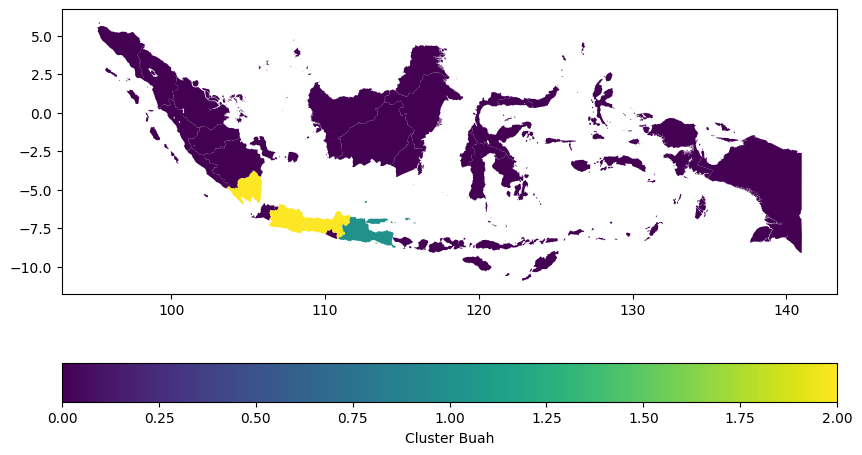

In [20]:
dfpetaindo = gpd.read_file(f'{cwd}/indonesia-prov.geojson.json')
dfpetaindo = dfpetaindo.sort_values(by=['Propinsi'])
dfpetaindo = dfpetaindo.reset_index(drop=True) #reset index
dfpetaindo = dfpetaindo.assign(cluster=QQ)
print(dfpetaindo)
plt.figure(figsize = (10,6))
dfpetaindo.plot(column = 'cluster',figsize = (10,6), legend=True,legend_kwds={'label': "Cluster Buah",'orientation': "horizontal"})

# dfpetaindo.figure(figsize = (10,6))

In [52]:
transposehasil = resultgmm.loc[:, ['provinsi','alpukat','belimbing','duku','durian','jambubiji','jambuair','jeruksiam','jerukbesar','mangga','manggis','nangka','nanas','pepaya','pisang','rambutan','salak','sawo','sirsak','sukun','melon','semangka','apel','anggur','stroberi']]
print(transposehasil.head(35))

               provinsi   alpukat  belimbing     duku    durian  jambubiji  \
0                  ACEH   44484.0     1202.0   6814.0   45915.0    12144.0   
1                  BALI    5123.0      477.0   2478.0   25743.0     3637.0   
2       BANGKA BELITUNG    1509.0      116.0    852.0    6212.0      640.0   
3                BANTEN    1444.0     1449.0   2023.0   29456.0     5164.0   
4              BENGKULU    6877.0      312.0    242.0   18639.0     1614.0   
5         DI YOGYAKARTA   10931.0      667.0   2596.0    9258.0     4849.0   
6           DKI JAKARTA    1698.0     3040.0     19.0     223.0      975.0   
7             GORONTALO      24.0       12.0     54.0    4381.0       19.0   
8                 JAMBI   10489.0     1438.0  18072.0   26209.0     4707.0   
9            JAWA BARAT  110046.0     8769.0   9091.0   86785.0    69249.0   
10          JAWA TENGAH   75707.0    18878.0  15125.0  159199.0   111674.0   
11           JAWA TIMUR  158581.0    75970.0  16407.0  275319.0 

In [53]:
#transpose
setnumber = range(0,35)
setnumber = list(setnumber)
setnumber = pd.DataFrame(setnumber)
transposehasilX = transposehasil.T
transposehasilX = transposehasilX.reset_index()
transposehasilX.columns = [list(range(0,35))]
print(transposehasilX.head(35))

            0         1         2                3         4         5   \
0     provinsi      ACEH      BALI  BANGKA BELITUNG    BANTEN  BENGKULU   
1      alpukat   44484.0    5123.0           1509.0    1444.0    6877.0   
2    belimbing    1202.0     477.0            116.0    1449.0     312.0   
3         duku    6814.0    2478.0            852.0    2023.0     242.0   
4       durian   45915.0   25743.0           6212.0   29456.0   18639.0   
5    jambubiji   12144.0    3637.0            640.0    5164.0    1614.0   
6     jambuair    5445.0    1437.0           1357.0    4857.0     984.0   
7    jeruksiam   12319.0  240636.0           1583.0     975.0   22732.0   
8   jerukbesar   10221.0     981.0              8.0      69.0       0.0   
9       mangga   21782.0   55166.0           2237.0   22713.0    6392.0   
10     manggis    3371.0   24820.0            398.0    4934.0    5048.0   
11      nangka    8411.0   27931.0           2659.0    5930.0    4578.0   
12       nanas     734.0 

In [54]:
#drop
transposehasilX.drop([0], axis=0, inplace=True)
print(transposehasilX)

            0         1         2       3         4        5        6   \
1      alpukat   44484.0    5123.0  1509.0    1444.0   6877.0  10931.0   
2    belimbing    1202.0     477.0   116.0    1449.0    312.0    667.0   
3         duku    6814.0    2478.0   852.0    2023.0    242.0   2596.0   
4       durian   45915.0   25743.0  6212.0   29456.0  18639.0   9258.0   
5    jambubiji   12144.0    3637.0   640.0    5164.0   1614.0   4849.0   
6     jambuair    5445.0    1437.0  1357.0    4857.0    984.0   4944.0   
7    jeruksiam   12319.0  240636.0  1583.0     975.0  22732.0   2726.0   
8   jerukbesar   10221.0     981.0     8.0      69.0      0.0    118.0   
9       mangga   21782.0   55166.0  2237.0   22713.0   6392.0  33456.0   
10     manggis    3371.0   24820.0   398.0    4934.0   5048.0   2782.0   
11      nangka    8411.0   27931.0  2659.0    5930.0   4578.0  15238.0   
12       nanas     734.0     630.0  6827.0     388.0    385.0    566.0   
13      pepaya   32041.0   12554.0  25

In [55]:
print(transposehasil)

               provinsi   alpukat  belimbing     duku    durian  jambubiji  \
0                  ACEH   44484.0     1202.0   6814.0   45915.0    12144.0   
1                  BALI    5123.0      477.0   2478.0   25743.0     3637.0   
2       BANGKA BELITUNG    1509.0      116.0    852.0    6212.0      640.0   
3                BANTEN    1444.0     1449.0   2023.0   29456.0     5164.0   
4              BENGKULU    6877.0      312.0    242.0   18639.0     1614.0   
5         DI YOGYAKARTA   10931.0      667.0   2596.0    9258.0     4849.0   
6           DKI JAKARTA    1698.0     3040.0     19.0     223.0      975.0   
7             GORONTALO      24.0       12.0     54.0    4381.0       19.0   
8                 JAMBI   10489.0     1438.0  18072.0   26209.0     4707.0   
9            JAWA BARAT  110046.0     8769.0   9091.0   86785.0    69249.0   
10          JAWA TENGAH   75707.0    18878.0  15125.0  159199.0   111674.0   
11           JAWA TIMUR  158581.0    75970.0  16407.0  275319.0 

In [89]:
transposehasilX.columns = ['BUAH','ACEH','BALI','BANGKA BELITUNG','BANTEN','BENGKULU','DI YOGYAKARTA','DKI JAKARTA','GORONTALO','JAMBI','JAWA BARAT','JAWA TENGAH','JAWA TIMUR','KALIMANTAN BARAT','KALIMANTAN SELATAN','KALIMANTAN TENGAH','KALIMANTAN TIMUR','KALIMANTAN UTARA','KEPULAUAN RIAU','LAMPUNG','MALUKU','MALUKU UTARA','NUSA TENGGARA BARAT','NUSA TENGGARA TIMUR','PAPUA','PAPUA BARAT','RIAU','SULAWESI BARAT','SULAWESI SELATAN','SULAWESI TENGAH','SULAWESI TENGGARA','SULAWESI UTARA','SUMATERA BARAT','SUMATERA SELATAN','SUMATERA UTARA']
transposehasilX.reset_index(inplace = True, drop = True)
print(transposehasilX.head(25))

          BUAH      ACEH      BALI BANGKA BELITUNG    BANTEN BENGKULU  \
0      alpukat   44484.0    5123.0          1509.0    1444.0   6877.0   
1    belimbing    1202.0     477.0           116.0    1449.0    312.0   
2         duku    6814.0    2478.0           852.0    2023.0    242.0   
3       durian   45915.0   25743.0          6212.0   29456.0  18639.0   
4    jambubiji   12144.0    3637.0           640.0    5164.0   1614.0   
5     jambuair    5445.0    1437.0          1357.0    4857.0    984.0   
6    jeruksiam   12319.0  240636.0          1583.0     975.0  22732.0   
7   jerukbesar   10221.0     981.0             8.0      69.0      0.0   
8       mangga   21782.0   55166.0          2237.0   22713.0   6392.0   
9      manggis    3371.0   24820.0           398.0    4934.0   5048.0   
10      nangka    8411.0   27931.0          2659.0    5930.0   4578.0   
11       nanas     734.0     630.0          6827.0     388.0    385.0   
12      pepaya   32041.0   12554.0          2517.0 

In [91]:
dfbuaholah = transposehasilX.loc[:, ['ACEH','BALI','BANGKA BELITUNG','BANTEN','BENGKULU','DI YOGYAKARTA','DKI JAKARTA','GORONTALO','JAMBI','JAWA BARAT','JAWA TENGAH','JAWA TIMUR','KALIMANTAN BARAT','KALIMANTAN SELATAN','KALIMANTAN TENGAH','KALIMANTAN TIMUR','KALIMANTAN UTARA','KEPULAUAN RIAU','LAMPUNG','MALUKU','MALUKU UTARA','NUSA TENGGARA BARAT','NUSA TENGGARA TIMUR','PAPUA','PAPUA BARAT','RIAU','SULAWESI BARAT','SULAWESI SELATAN','SULAWESI TENGAH','SULAWESI TENGGARA','SULAWESI UTARA','SUMATERA BARAT','SUMATERA SELATAN','SUMATERA UTARA']]
print(dfbuaholah)

        ACEH      BALI BANGKA BELITUNG    BANTEN BENGKULU DI YOGYAKARTA  \
0    44484.0    5123.0          1509.0    1444.0   6877.0       10931.0   
1     1202.0     477.0           116.0    1449.0    312.0         667.0   
2     6814.0    2478.0           852.0    2023.0    242.0        2596.0   
3    45915.0   25743.0          6212.0   29456.0  18639.0        9258.0   
4    12144.0    3637.0           640.0    5164.0   1614.0        4849.0   
5     5445.0    1437.0          1357.0    4857.0    984.0        4944.0   
6    12319.0  240636.0          1583.0     975.0  22732.0        2726.0   
7    10221.0     981.0             8.0      69.0      0.0         118.0   
8    21782.0   55166.0          2237.0   22713.0   6392.0       33456.0   
9     3371.0   24820.0           398.0    4934.0   5048.0        2782.0   
10    8411.0   27931.0          2659.0    5930.0   4578.0       15238.0   
11     734.0     630.0          6827.0     388.0    385.0         566.0   
12   32041.0   12554.0   

In [92]:
# Silhouette Analysis GMMZSCORE asli
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # Initialise gmm
    gmmzscoren = GaussianMixture(n_components=num_clusters, random_state=6, covariance_type='full',reg_covar=1e-04,max_iter=10000,tol=1e-05)
    cluster_labels = gmmzscoren.fit_predict(dfbuaholah)
    # Silhouette Score
    silhouette_avg = silhouette_score(dfbuaholah, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.8034216319973165
For n_clusters=3, the silhouette score is 0.6393119776546048
For n_clusters=4, the silhouette score is 0.6503083806831659
For n_clusters=5, the silhouette score is 0.6090103447188188
For n_clusters=6, the silhouette score is 0.40516448974331126
For n_clusters=7, the silhouette score is 0.41101081942189815
For n_clusters=8, the silhouette score is 0.4174672943696029
For n_clusters=9, the silhouette score is 0.38426065352505295
For n_clusters=10, the silhouette score is 0.342431843919544


In [94]:
gmmfix2 = GaussianMixture(n_components=4, random_state=6, covariance_type='full',reg_covar=1e-04,max_iter=10000,tol=1e-05)
hasil_clusterstandardisasi2 = gmmfix2.fit_predict(dfbuaholah)
hasil_clusterstandardisasi2 = pd.DataFrame(hasil_clusterstandardisasi2)
hasil_clusterstandardisasi2.columns = ['Cluster']
means2 = pd.DataFrame(gmmfix2.means_)
pd.set_option("display.max_columns", 40)
means2.columns = ['ACEH','BALI','BANGKA BELITUNG','BANTEN','BENGKULU','DI YOGYAKARTA','DKI JAKARTA','GORONTALO','JAMBI','JAWA BARAT','JAWA TENGAH','JAWA TIMUR','KALIMANTAN BARAT','KALIMANTAN SELATAN','KALIMANTAN TENGAH','KALIMANTAN TIMUR','KALIMANTAN UTARA','KEPULAUAN RIAU','LAMPUNG','MALUKU','MALUKU UTARA','NUSA TENGGARA BARAT','NUSA TENGGARA TIMUR','PAPUA','PAPUA BARAT','RIAU','SULAWESI BARAT','SULAWESI SELATAN','SULAWESI TENGAH','SULAWESI TENGGARA','SULAWESI UTARA','SUMATERA BARAT','SUMATERA SELATAN','SUMATERA UTARA']
print(means2)
print("Jumlah fitur(variabel)",gmmfix2.n_features_in_)

        ACEH      BALI  BANGKA BELITUNG     BANTEN  BENGKULU  DI YOGYAKARTA  \
0   11277.05    9150.0          1201.45    6120.65    2812.6        8657.25   
1   17050.50  147901.0          1910.00   11844.00   14562.0       18091.00   
2  108643.00  382536.0          6980.00  284683.00   22492.0       68257.00   
3     734.00     630.0          6827.00     388.00     385.0         566.00   

   DKI JAKARTA  GORONTALO     JAMBI  JAWA BARAT  JAWA TENGAH  JAWA TIMUR  \
0       937.35      441.7   7116.25     40790.1     73603.45   112507.65   
1      4778.50    12602.5  26719.50    247813.5    240279.00  1007578.00   
2      3302.00     6938.0  69258.00   1649228.0    804262.00  2048948.00   
3         0.00       92.0  32756.00    276195.0    344852.00   198773.00   

   KALIMANTAN BARAT  KALIMANTAN SELATAN  KALIMANTAN TENGAH  KALIMANTAN TIMUR  \
0            6386.3              6255.1             4004.6           5379.05   
1           41662.5             60246.0             6076.5     

In [95]:
frames1 = transposehasilX['BUAH']
frames1 = pd.DataFrame(frames1)
frames1.columns = ['BUAH']
# frames = frames.sort_values(by=['provinsi'],ignore_index=True)
# print(frames)
# dfkl = dfkl.drop(['provinsi'],axis=1)
resultgmmx2 = frames1.join(dfbuaholah, how="outer")
resultgmm2 = resultgmmx2.join(hasil_clusterstandardisasi2, how="outer")
# resultgmm2 = resultgmm2.sort_values(by=["BUAH"])
# print(resultgmm.head(35))
# print(frames)
# resultgmm = resultgmmx.join(hasil_clusterstandardisasi, how="outer")
print(resultgmm2)
# resultgmm = resultgmm.sort_values('provinsi')
# clusters = resultgmm['Cluster']

          BUAH      ACEH      BALI BANGKA BELITUNG    BANTEN BENGKULU  \
0      alpukat   44484.0    5123.0          1509.0    1444.0   6877.0   
1    belimbing    1202.0     477.0           116.0    1449.0    312.0   
2         duku    6814.0    2478.0           852.0    2023.0    242.0   
3       durian   45915.0   25743.0          6212.0   29456.0  18639.0   
4    jambubiji   12144.0    3637.0           640.0    5164.0   1614.0   
5     jambuair    5445.0    1437.0          1357.0    4857.0    984.0   
6    jeruksiam   12319.0  240636.0          1583.0     975.0  22732.0   
7   jerukbesar   10221.0     981.0             8.0      69.0      0.0   
8       mangga   21782.0   55166.0          2237.0   22713.0   6392.0   
9      manggis    3371.0   24820.0           398.0    4934.0   5048.0   
10      nangka    8411.0   27931.0          2659.0    5930.0   4578.0   
11       nanas     734.0     630.0          6827.0     388.0    385.0   
12      pepaya   32041.0   12554.0          2517.0 